# The Short-time fourier transform <a class="tocSkip">

based on:
 1. https://en.wikipedia.org/wiki/Short-time_Fourier_transform
 
2.
https://www.dsprelated.com/freebooks/sasp/Short_Time_Fourier_Transform.html

3. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html#scipy.signal.stft

4. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.istft.html#scipy.signal.istft

5. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html

## intro

### The STFT

The STFT is a Fourier-related transform used to determine the sinusoidal frequency and phase content of local sections of a signal as it changes over time.

$ STFT(x[n],m,\omega)=X(m,\omega)=\sum_{n=-\infty}^{\infty}x[n]\omega[n-mR]*e^{-i\omega n}$

* $\omega [n]-length M window function$
* m- index of the hops
* $ X_m (\omega)$-DTFT of window centerd about time mR
* R-hop size in samples, between successive DTFTs


#### The inverse STFT
the spectrum of frequencies of a signal as it varies with time.

#### The spectogram
A common format is a graph with two geometric dimensions: one axis represents time, and the other axis represents frequency; a third dimension indicating the amplitude of a particular frequency at a particular time is represented by the intensity or color of each point in the image.

in the difure: a spectogram of an FM[frequency modulated] signal, the signal is modulated with a sinusoidal frequency

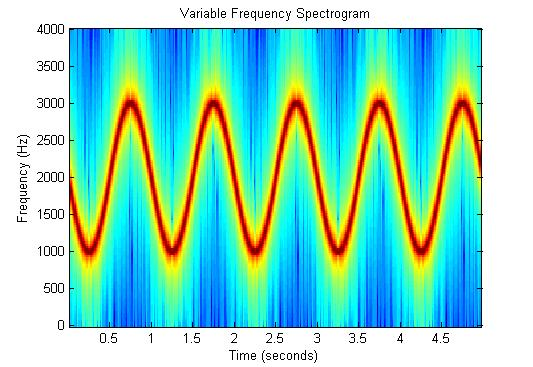

## Example:

test signal, a 2 Vrms sine wave whose frequency is slowly modulated around 3kHz, corrupted by white noise of exponentially decreasing magnitude sampled at 10 kHz

In [1]:
# imports

# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.fft import fft, ifft, fftfreq, fftshift

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

### present signal

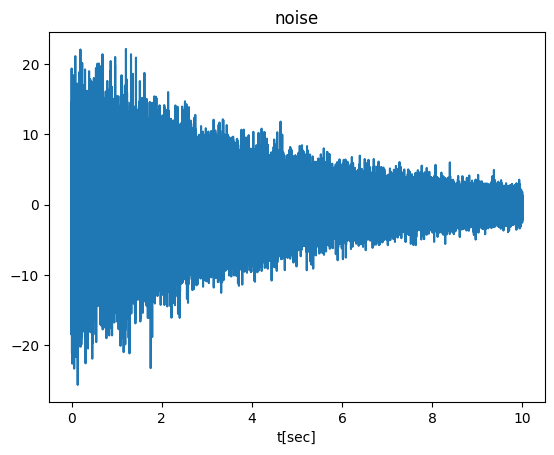

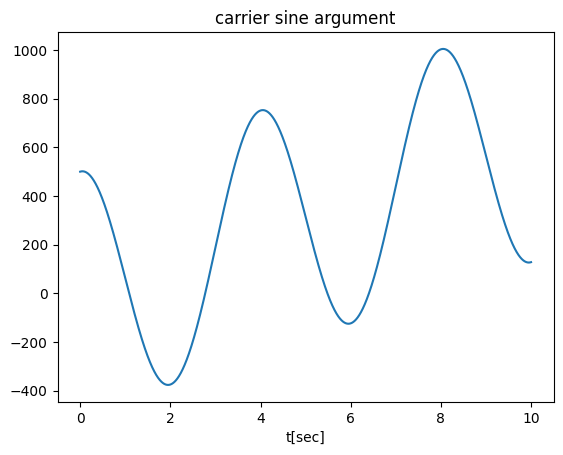

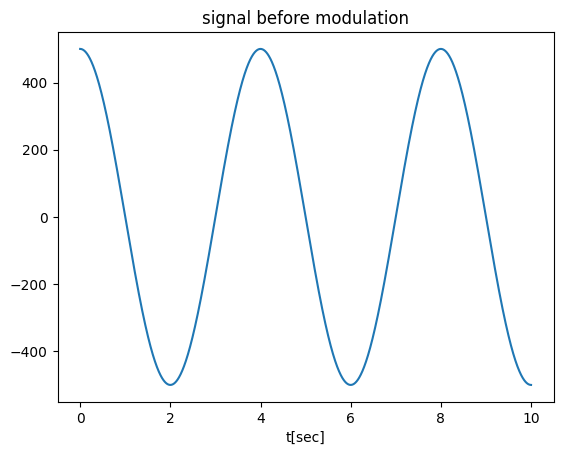

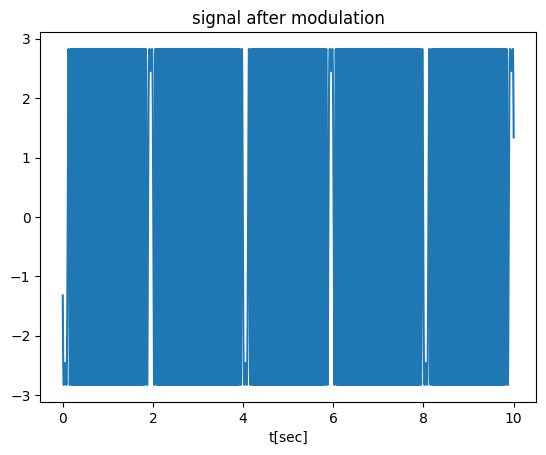

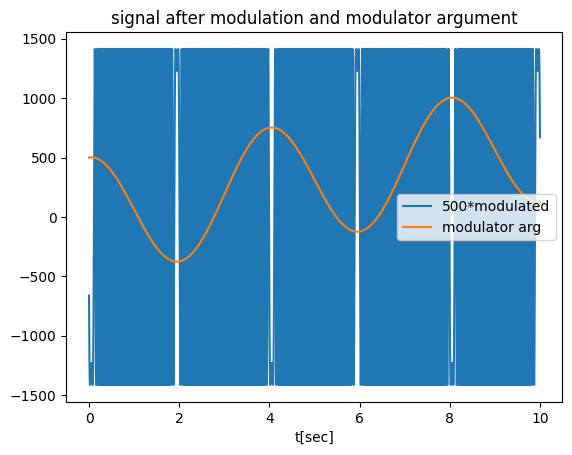

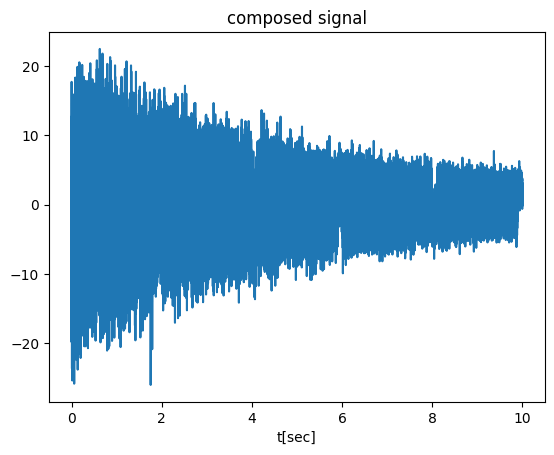

In [2]:
# present signal

## time interval
T=2

## sampling frequency
fs = 10e3

## Number of samples
N=1e5

## time vector
time = np.arange(N) / float(fs)
# t=np.linspace(start=0,stop=T-1/fs,num=N)

## signal with no noise
amp = 2 * np.sqrt(2)
signalx = 500*np.cos(2*np.pi*0.25*time)

## noise
noise_power = 0.01 * fs / 2
noise = rng.normal(scale=np.sqrt(noise_power),
                   size=time.shape)
noise *= np.exp(-time/5) # c*=a<-->c=c*a

## modulation
carrier_frequency=10
carrier = amp * np.sin(2*np.pi*carrier_frequency*time + signalx)

## modulated signal and noise
x = carrier + noise

## present signal parts
plt.plot(time,noise)
plt.title('noise')
plt.xlabel('t[sec]')
plt.show()


carrier_argument=2*np.pi*carrier_frequency*time + signalx
plt.plot(time,carrier_argument)
plt.title('carrier sine argument')
plt.xlabel('t[sec]')
plt.show()

plt.plot(time,signalx)
plt.title('signal before modulation')
plt.xlabel('t[sec]')
plt.show()

plt.plot(time,carrier)
plt.title('signal after modulation')
plt.xlabel('t[sec]')
plt.show()

plt.plot(time,carrier*500,time,carrier_argument)
plt.title('signal after modulation and modulator argument')
plt.legend(['500*modulated','modulator arg'])
plt.xlabel('t[sec]')
# plt.xlim([0,0.2])
plt.show()

## present composed signal 
plt.plot(time,x)
plt.title('composed signal')
plt.xlabel('t[sec]')
plt.show()

### analize signal with STFT

number of segments  100.0
noverlap  0
Zxx shape  (501, 101)  f shape  (501,) t shape  (101,)


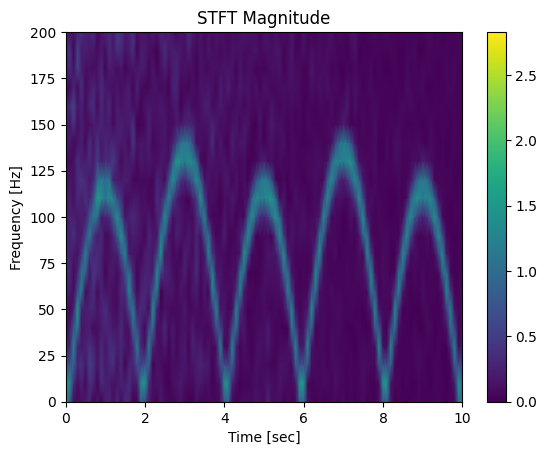

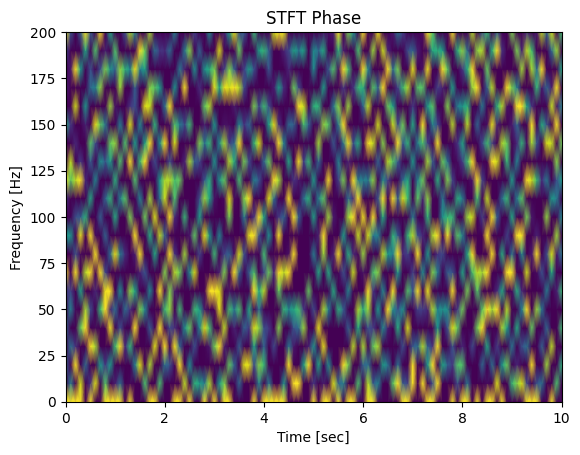

In [3]:
# analize the signal
nperseg=1000
noverlap=0
print('number of segments ',N//nperseg)
print('noverlap ',noverlap)
f, t, Zxx = signal.stft(x, fs, nperseg=nperseg,noverlap=noverlap)
print('Zxx shape ',np.shape(Zxx),' f shape ',np.shape(f),'t shape ',np.shape(t))

plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')
plt.ylim([0,200])
plt.colorbar()
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


plt.pcolormesh(t, f, np.angle(Zxx), vmin=0, vmax=amp, shading='gouraud')
plt.ylim([0,200])
plt.title('STFT Phase')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

### reconstruct the signal with ISTFT

In [4]:
#TBD

## Appendix

### pcolormesh

matplotlib.pyplot.pcolormesh([X,Y] C),


* **C**-tHE MESH DATA
1. (M,N)-->the values are mapped to colors using normalization and colormap. see: **norm**, **cmap**, **vmin**, **vmax**
2. (M,N,3)-->image with RGB values(0-255)
3. (M,N,4)-->image with RGBA values

(M,N) defines the rows and columns of the mesh data

* **X,Y**-the cordinates of the corners of quadrilaterals

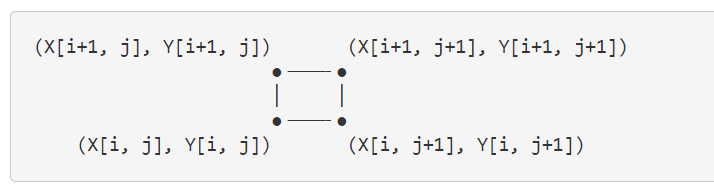
    
* **cmap**-the object(Colormap) that maps scalar data to colors. the default is: rcParams["image.cmap"]('viridis)

* **norm**-normalization method to scale the data between (0,1)

* **vmin** and **vmax**-when no explicit norm is used vmin and vmax define the data range that the colormap covers


### stft

 scipy.signal.stft(x,fs,window,nperseg,noverlap, return_onesided, padded, scaling)

#### input
* **x**-signal
* **fs**-sampling frequency
* **window**-desired window to use, if it is a string/tuple it get passed to **get_window**
* **nperseg**-length of each segment
* **noverlap**-number of points to overlap between segments the COLA constaraint must be met
* **return_onesided**-if true return one sided spectrum for real data, for complex data will always be 2-sided.
* **padded**-zero padded, default to True
* **scaling**-{'spectrum','psd'}, "spectrum" is the default, which set each frequency line of Zxx to be interpted as a magnitude spectrum. the "psd" makes each line to a power spectral density

#### output
* **f**- sample frequencies
* **t**-segment times
* **Zxx**-STFT of x, the last axis corresponds to segment times.

#### notes
1. the window must obey the NOLA(Nonzero OverLap Add)
2. the input signal must have complete window coverage$\-->$ (x.shape[axis]-nperseg)%(nperseg-noverlap)==0, you could use padded to accomplish this

for hop size H=nperseg-noverlap, the windowed frame at time index 't' is given by:
$x_t[n]=x[n]\omega[n-t*H]$

The OLA(overlapp-add) reconstruction equation is given by:
$x[n]=\frac{\sum_t x[n]_t\omega[n-t*H]}{\sum_t \omega^2[n-tH]}$

The NOLA constraint will ensure that the denominator wont be zero, if **window** and **nperseg** and **noverlap** satisfy **check_NOLA** 

### istft

scipy.signal.istft(Zxx, fs=1.0, window='hann', nperseg=None, noverlap=None, input_onesided=True, scaling='spectrum')

#### input
* **Zxx**-STFT of a signal
* **fs**-sampling frequency
* **window**-desired window to use, if it is a string/tuple it get passed to **get_window**
* **nperseg**-length of each segment
* **noverlap**-number of points to overlap between segments the COLA constaraint must be met
* **return_onesided**-if true return one sided spectrum for real data, for complex data will always be 2-sided.
* **padded**-zero padded, default to True
* **scaling**-{'spectrum','psd'}, "spectrum" is the default, which set each frequency line of Zxx to be interpted as a magnitude spectrum. the "psd" makes each line to a power spectral density

#### output

* **t**-signal times
* **x**-ISTFT of Zxx.

#### notes
* the original signal windowing must obey the NOLA constarint 